### Dynamic College–Labor Model with **Heterogeneous Beliefs**

This extension allows agents to hold **different subjective beliefs** about the human-capital return to college.  
Each agent is assigned a belief index $m \in \{1,\dots,M\}$ with perceived boost $b_m$ (while the **true** boost is $b^\star$).  
The model proceeds in two stages:

1. **Backward induction** solves two policy sets  
   $\{\pi_t^{W}\}$ (work) and $\{\pi_t^{E,m}\}$ (college under belief $m$).  
2. **Simulation** draws initial states $(A_0,k_0)$ and belief indices, lets each agent choose the higher-valued path, and then iterates forward.

---

##### 1. Initial Choice  $(t=0)$

For an agent with belief $m$

\begin{equation}
V_0=
\max\!\bigl\{
      \mathbb{E}[V^{C}_0] ,\;
      \mathbb{E}[V^{W}_0]
\bigr\}.
\tag{1}
\end{equation}



##### 2. College Phase  $(t \le t_{\text{col}})$

\begin{equation}
V^{C}_t(a_t,k_t)=
\max_{c_t}\Bigl\{
      \tfrac{c_t^{1-\rho}}{1-\rho}-\kappa_X
      +\beta\, \mathbb{E}\left[V^{C}_{t+1}(a_{t+1},k_{t+1}) \mid b_m \right]
\Bigr\},
\tag{2}
\end{equation}

\begin{equation}
a_{t+1}=(1+r)a_t-c_t-\text{college cost}+y,
\tag{3}
\end{equation}

\begin{equation}
k_{t+1}=k_t+b_m.
\tag{4}
\end{equation}



##### 3. Graduation Update  $(t = t_{\text{col}})$

When college ends the *true* boost is revealed; human capital is corrected

\begin{equation}
k_{t_{\!c}+1}=k_{t_{\!c}}+b^\star+3\bigl(b^\star-b_m\bigr),
\tag{5}
\end{equation}

so optimistic (pessimistic) agents receive a negative (positive) surprise.



##### 4. Labor-Market Phase  $(t > t_{\text{col}})$

For both college graduates and direct workers

\begin{equation}
V^{W}_t(a_t,k_t)=
\max_{c_t,h_t}\Bigl\{
      \tfrac{c_t^{1-\rho}}{1-\rho}
      -\varphi\tfrac{h_t^{1+\eta}}{1+\eta}
      +\beta\,V^{W}_{t+1}(a_{t+1},k_{t+1})
\Bigr\},
\tag{6}
\end{equation}

\begin{equation}
a_{t+1}=(1+r)a_t+(1-\tau_{\text{tax}})w_t h_t-c_t+y,
\tag{7}
\end{equation}

\begin{equation}
w_t=w_0\bigl(1+\alpha k_t\bigr),
\tag{8}
\end{equation}

\begin{equation}
k_{t+1}=k_t+h_t.
\tag{9}
\end{equation}

---

#### Key Features
* **Belief-dependent policy functions:** college policies $\pi^{E,m}$ are solved once for each belief type.  
* **Endogenous path choice:** each agent compares $V^{E,m}$ to $V^{W}$ at $t=0$.  
* **Realized mismatch:** after graduation the true return $b^\star$ governs wages and human-capital growth.

This structure enables counterfactuals on belief distributions while tracking heterogeneous welfare impacts.

---

### Model Parameter Settings

| **Parameter**         | **Value**                                         | **Description**                                                     |
|----------------------|---------------------------------------------------|---------------------------------------------------------------------|
| `T`                  | 50                                                | Number of periods (e.g., age 18 to 68)                              |
| `t_college`          | 4                                                 | Duration of college before entering the labor market                |
| `β` (`beta`)         | 0.97                                             | Discount factor (annual)                                            |
| `ρ` (`rho`)          | 1.0                                              | Relative risk aversion (CRRA utility)                               |
| `η` (`eta`)          | 2.0                                               | Inverse Frisch elasticity (elasticity ≈ 0.5)                          |
| `ϕ` (`phi`)          | 0.003                                              | Weight on disutility of labor                                       |
| `r`                  | 0.03                                              | Real interest rate (annual)                                         |
| `w_0`                | 100,000                                           | Base wage (e.g., starting wage at age 18)                           |
| `α` (`alpha`)        | 0.1                                               | Wage increase per year of human capital (education or experience)   |
| `τ_tax`              | 0.25                                              | Labor income tax rate                                               |
| `κ_X` (`kappa_X`)    | 3,000                                             | Annual psychic cost of attending college                            |
| `college cost`       | 12,000                                            | Annual direct college cost                                          |
| `college boost`      | 2.5                                               | Human capital gain per year of education (1 unit per year)          |
| `a_max`              | 1,000,000                                         | Maximum asset level in grid                                         |
| `Na`                 | 100                                               | Number of grid points for assets                                    |
| `Nk`                 | 50                                                | Number of grid points for human capital                             |
| `k_grid`             | `nonlinspace(0.0, 30.0, Nk, 1.1)`                 | Human capital grid: up to 30 years of experience/schooling          |
| `a_grid`             | `nonlinspace(0.0, a_max, Na, 2.0)`               | Asset grid with finer resolution near zero                          |
| `sim_a_init`         | `rand(rng, simN) .* 100_000`                      | Initial asset distribution: uniformly random up to 100,000          |
| `sim_k_init`         | `zeros(Float64, simN)`                            | Initial human capital: all individuals start with zero              |

---

### Pseudo-Algorithm: Simulation with Heterogeneous Beliefs

This extension allows agents to hold different subjective beliefs about the human-capital return to college.  
Each agent is assigned a belief index $m \in \{1, \dots, M\}$, with perceived boost $b_m$ (the true boost is $b^\star$).



#### **Model Solution (Backward Induction)**

**Input:**  
Parameter set, grids for $a$ (assets) and $k$ (human capital)

##### **A. Work Path Solver**
**Steps:**

1. **Final Period ($t = T$):**
    - For each $(a_T, k_T)$:
        - **Optimize** over labor supply $h_T$:
          - All resources are consumed: $c_T = a_T + \text{wage}_T \cdot h_T + y$
          - Maximize terminal utility $U_T(c_T, h_T)$ with respect to $h_T \in [0,1]$
        - **Store**: optimal $h_T$, $c_T$, and value

2. **Earlier Periods ($t = T-1$ down to $1$):**
    - For each $(a_t, k_t)$:
        - **Interpolate** next-period value $V_{t+1}(a_{t+1}, k_{t+1})$
        - **Optimize** over current consumption $c_t$ and labor $h_t$:
          $$
          \max_{c_t, h_t} \ U_t(c_t, h_t) + \beta V_{t+1}(a_{t+1}, k_{t+1})
          $$
        - **State transitions:**
          - $a_{t+1} = (1 + r)a_t + \text{wage}_t \cdot h_t - c_t + y$
          - $k_{t+1} = k_t + h_t$
        - **Store**: optimal $c_t$, $h_t$, and value



##### **B. College Path Solver**

**Input:**  
- Grids for $a$, $k$, model parameters, and $t_{college}$ (number of periods in college)

**Steps:**
1. **Post-College Periods ($t = t_{college} + 1$ up to $T$):**
    - **Follow the same steps as the Work Path Solver for each $(a_t, k_t)$:**
        - Agents join the workforce after finishing college.
        - Use the same optimization and state transition rules as in the work path.

1. **College Periods ($t = t_{college}$ down to $1$):**
    - For each $(a_t, k_t)$:
        - **Interpolate** next-period value $V_{t+1}(a_{t+1}, k_{t+1})$
        - **Optimize** over $c_t$ (no labor: $h_t = 0$):
          $$
          \max_{c_t} \ U_t^{\text{college}}(c_t) + \beta V_{t+1}(a_{t+1}, k_{t+1})
          $$
        - **State transitions:**
          - $a_{t+1} = (1 + r)a_t - c_t - \text{college\_cost} + y$
          - $k_{t+1} = k_t + \text{college\_boost}$
        - **Store**: optimal $c_t$, $h_t = 0$, and value


**Output:**  
Grids of value and policy functions for college and work, for all $(a_t, k_t)$ and all $t$

---

#### **Simulation**

**Input:**  
- Initial states $(a_1^i, k_1^i)$ for $N$ agents  
- Each agent $i$ is assigned a belief index $m_i \in \{1,\dots,M\}$  
- Precomputed policy/value functions for:
  - Work path: $\{\pi_t^{W}\},\ \{V_t^{W}\}$
  - College path under belief $m$: $\{\pi_t^{E,m}\},\ \{V_t^{E,m}\}$

**For each agent** $i = 1, ..., N$:
1. **Assign belief:** $b_m$ according to agent’s $m_i$
2. **Initial state:** $(a_1^i, k_1^i)$
3. **Path choice:**  
    - Compute $V_{\text{work}}^i = V_1^{W}(a_1^i, k_1^i)$  
    - Compute $V_{\text{college}}^i = V_1^{E, m_i}(a_1^i, k_1^i)$  
    - **If** $V_{\text{college}}^i > V_{\text{work}}^i$ **then** assign college path under belief $m_i$, else assign work path

4. **Simulate forward for $t = 1, \dots, T$:**
    - **If** agent chose college path:
        - **For** $t \leq t_{college}$:  
            - Use policy $\pi_t^{E, m_i}$ for belief $m_i$ (no labor, only consumption)
            - Update states with college cost and belief-specific boost
        - **For** $t > t_{college}$:  
            - Use policy $\pi_t^{E, m_i}$ (post-college, now working)
            - Update states as in the work model, with capital from real college boost
    - **If** agent chose work path:
        - For all $t$, use policy $\pi_t^{W}$  
        - Update states using work model equations

    - **Store**: $c_t^i, h_t^i, a_t^i, k_t^i, \text{income}_t^i, \text{wage}_t^i$, and path choice

5. **After all agents:**  
    - Group agents by chosen path and/or belief type
    - Compute group averages over time for key variables (e.g., consumption, assets, hours, human capital, income, wage)
    - Prepare results for plotting and analysis

---

> **Note:**  
> Policy functions and value functions are precomputed by backward induction for each belief type. Simulation reflects heterogeneous expectations about college returns, affecting path choice and realized outcomes.

---

In [5]:
using Random, NLopt, LinearAlgebra, Interpolations, Base.Threads, DataFrames
using Plots, Statistics, ProgressMeter, ForwardDiff, Distributions, Profile
using DataFrames, Measures, StatsBase, LaTeXStrings, Printf

In [30]:
# -------------------------------
# Utility: Nonlinear Grid Creator
# -------------------------------
function nonlinspace(start::Float64, stop::Float64, num::Int, curv::Float64)
    lin_vals = range(0, stop=1, length=num)
    curved_vals = lin_vals .^ curv
    return start .+ (stop - start) .* curved_vals
end

function create_focused_grid(a_min::Float64, a_focus::Float64, a_max::Float64, Na::Int, focus_share::Float64, curv::Float64)
    Na_focus = ceil(Int, Na * focus_share)
    Na_rest = Na - Na_focus
    grid_focus = nonlinspace(a_min, a_focus, Na_focus, curv)
    grid_rest = nonlinspace(a_focus, a_max, Na_rest + 1, curv)[2:end]
    return vcat(grid_focus, grid_rest)
end

# =============================================================================
# Dynamic Labor Model Definition with College Decision
#
# This mutable struct defines the model parameters, state grids, solution arrays,
# and simulation arrays for a dynamic consumption-saving model with a college decision.
#
# Key components:
# - Model parameters (e.g., T, beta, r, w, etc.)
# - State variable grids (for assets 'a_grid' and human capital 'k_grid')
# - Solution arrays for both work and college choices (consumption, labor, and value functions)
# - Simulation arrays for consumption, assets, labor, and capital over simulated life paths
# - Other auxiliary arrays, such as initial conditions, random draws, and wage vector (w_vec)
# - Parameters for the college decision (college_cost and college_boost)
# =============================================================================
mutable struct ConSavLaborCollege_SE
    T::Int                     # Total number of periods
    t_college::Int             # Number of college periods
    rho::Float64               # Risk aversion parameter (or relative risk aversion)
    beta::Float64              # Discount factor
    phi::Float64               # Parameter (e.g., disutility of labor or related to college)
    eta::Float64               # Another parameter (e.g., related to preferences)
    alpha::Float64             # Wage increase per year of human capital
    y::Float64                 # Unearned income 
    w::Float64                 # Base wage level
    tau::Float64               # Tax rate or other scaling parameter on wage income
    r::Float64                 # Interest rate on assets
    a_max::Float64             # Maximum asset level in the grid
    a_min::Float64             # Minimum asset level (borrowing constraint)
    Na::Int                    # Number of grid points for assets
    k_max::Float64             # Maximum human capital level in the grid
    Nk::Int                    # Number of grid points for human capital
    simT::Int                  # Number of simulation periods (typically equals T)
    simN::Int                  # Number of simulation agents
    a_grid::Vector{Float64}    # Grid for assets (state variable)
    k_grid::Vector{Float64}    # Grid for human capital (state variable)

    # Solution arrays for the working alternative
    sol_c_work::Array{Float64, 3}  # Optimal consumption when working
    sol_h_work::Array{Float64, 3}  # Optimal labor supply when working
    sol_v_work::Array{Float64, 3}  # Value function when working

    # Solution arrays for the college alternative
    sol_c_college::Array{Float64, 3}  # Optimal consumption when in college
    sol_h_college::Array{Float64, 3}  # Optimal labor supply when in college (typically zero)
    sol_v_college::Array{Float64, 3}  # Value function when in college

    # Simulation arrays (each row corresponds to one simulated agent over time)
    sim_c::Matrix{Float64}      # Consumption over time
    sim_h::Matrix{Float64}      # Labor supply over time
    sim_a::Matrix{Float64}      # Asset holdings over time
    sim_k::Matrix{Float64}      # Human capital over time
    sim_a_init::Vector{Float64} # Initial asset levels for simulated agents
    sim_k_init::Vector{Float64} # Initial human capital for simulated agents
    sim_income::Matrix{Float64}  # Income over time (not explicitly defined in the original code)
    sim_wage::Matrix{Float64}  # Wage over time (not explicitly defined in the original code)
    
    draws_uniform::Matrix{Float64}  # Matrix of uniform random draws for simulation purposes
    w_vec::Vector{Float64}          # Wage vector over time (can vary across periods)
    college_cost::Float64           # Cost of attending college per period (or overall cost structure)
    college_boost::Float64          # Increase in human capital (or productivity boost) from college
end

# =============================================================================
# Constructor for ConSavLaborCollege_SE
#
# This constructor initializes the model with default parameters or user-specified ones.
# It sets up:
# - The time horizon (T) and the number of college periods (t_college)
# - The asset and human capital grids using the nonlinspace utility function
# - Empty solution arrays (filled with NaN) for both work and college alternatives
# - Simulation arrays with appropriate dimensions, including initial conditions
# - The wage vector (w_vec) and random draws for simulation purposes
# - The parameters specific to the college decision (college_cost and college_boost)
# =============================================================================
function ConSavLaborCollege_SE(; 
    T::Int=50, t_college::Int=4, beta::Float64=0.97, rho::Float64=1.0, 
    r::Float64=0.03, a_max::Float64=20.0, Na::Int=50, y::Float64=0.6,
    simN::Int=5000, a_min::Float64=0.0, k_max::Float64=30.0, Nk::Int=30, 
    w::Float64=12.5, tau::Float64=0.25, eta::Float64=2.0, alpha::Float64=0.1, 
    phi::Float64=20.0, seed::Int=1234, college_cost::Float64=1.2, 
    college_boost::Float64=2.0)
    
    simT = T  # Simulation time equals model time horizon
    
    # --- Grids for state variables ---
    #a_grid = create_focused_grid(a_min, 500000.0, a_max, Na, 0.5, 1.1);    # Nonlinear grid for assets
    a_grid = create_focused_grid(a_min, 8.0, a_max, Na, 0.7, 1.1)
    k_grid = nonlinspace(0.0, k_max, Nk, 1.5)      # Nonlinear grid for human capital

    # --- Initialize solution arrays (3D arrays for each period, asset, and human capital grid point) ---
    sol_c_work = fill(NaN, (T, Na, Nk));
    sol_h_work = fill(NaN, (T, Na, Nk));
    sol_v_work = fill(NaN, (T, Na, Nk));

    sol_c_college = fill(NaN, (T, Na, Nk));
    sol_h_college = fill(NaN, (T, Na, Nk));
    sol_v_college = fill(NaN, (T, Na, Nk));

    # --- Initialize simulation arrays (rows: simulated agents, columns: periods) ---
    sim_c = fill(NaN, (simN, T));
    sim_h = fill(NaN, (simN, T));
    sim_a = fill(NaN, (simN, T));
    sim_k = fill(NaN, (simN, T));

    # --- Set initial conditions for simulation ---
    rng = MersenneTwister(seed);
    sim_a_init = rand(rng, simN) .* 10;  # Initial assets drawn from a uniform distribution
    sim_k_init = zeros(Float64, simN);         # Initial human capital is set to zero
    sim_income = fill(NaN, (simN, T));  # Initialize income array for simulation
    sim_wage = fill(NaN, (simN, T));   # Initialize wage array for simulation

    # --- Initialize wage vector and random draws for simulation ---
    w_vec = fill(w, T);                        # Wage remains constant over time by default
    draws_uniform = rand(rng, simN, T);          # Uniform random draws for simulation purposes
    
    # --- Return an instance of ConSavLaborCollege_SE with all fields initialized ---
    return ConSavLaborCollege_SE(
        T, t_college, rho, beta, phi, eta, alpha, y, w, tau, r,
        a_max, a_min, Na, k_max, Nk, simT, simN, a_grid, k_grid,
        sol_c_work, sol_h_work, sol_v_work, sol_c_college, sol_h_college, sol_v_college,
        sim_c, sim_h, sim_a, sim_k,
        sim_a_init, sim_k_init, sim_income, sim_wage,
        draws_uniform, w_vec, college_cost, college_boost
    )
end

ConSavLaborCollege_SE

In [32]:
# --------------------------
# Model Solver for College Periods
# --------------------------
function solve_model_college!(model::ConSavLaborCollege_SE)
    T, Na, Nk = model.T, model.Na, model.Nk
    a_grid, k_grid = model.a_grid, model.k_grid
    sol_c, sol_h, sol_v = model.sol_c_college, model.sol_h_college, model.sol_v_college

    a_min_t = compute_min_assets(model)
    c_min = 1e-6  # Minimum consumption

    @showprogress 1 "Solving model..." for t in T:-1:1
        if t == T
            # Final period
            for i_a in 1:Na, i_k in 1:Nk
                assets = a_grid[i_a]
                capital = k_grid[i_k]
                function obj_wrapper(h_vec::Vector, grad::Vector)
                    f = obj_last_period(model, h_vec, assets, capital, T, grad)
                    if length(grad) > 0
                        grad[:] = -grad[:]
                    end
                    return -f
                end
                opt = Opt(:LD_SLSQP, 1)
                lower_bounds!(opt, [0.0])
                upper_bounds!(opt, [1.0])
                ftol_rel!(opt, 1e-6)
                min_objective!(opt, obj_wrapper)
                init = [0.5]
                (minf, h_vec, ret) = optimize(opt, init)
                h_opt = h_vec[1]
                cons = assets + wage_func(model, capital, T) * h_opt + model.y
                sol_h[T, i_a, i_k] = h_opt
                sol_c[T, i_a, i_k] = cons
                sol_v[T, i_a, i_k] = -minf
            end
        elseif t > model.t_college
            # Post-college work periods
            interp = create_interp(model, sol_v, t + 1)
            for i_a in 1:Na, i_k in 1:Nk
                assets = a_grid[i_a]
                capital = k_grid[i_k]
                function obj_wrapper(x::Vector, grad::Vector)
                    f = obj_work_period(model, x, assets, capital, t, interp, grad)
                    if length(grad) > 0
                        grad[:] = -grad[:]
                    end
                    return -f
                end
                function constraint_wrapper(x::Vector, grad::Vector)
                    return asset_constraint_work(x, grad, model, assets, capital, t)
                end
                opt = Opt(:LD_SLSQP, 2)
                lower_bounds!(opt, [1e-6, 0.0])
                upper_bounds!(opt, [30.0, 1.0])
                ftol_rel!(opt, 1e-6)
                min_objective!(opt, obj_wrapper)
                inequality_constraint!(opt, constraint_wrapper, 1e-6)
                init = [1.0, 0.5]  # or use previous guess if you want
                (minf, x_opt, ret) = optimize(opt, init)
                sol_c[t, i_a, i_k] = x_opt[1]
                sol_h[t, i_a, i_k] = x_opt[2]
                sol_v[t, i_a, i_k] = -minf
            end
        else
            # College periods (with feasibility check)
            interp = create_interp(model, sol_v, t + 1)
            for i_a in 1:Na
                assets = a_grid[i_a]
                if assets < a_min_t[t]
                    for i_k in 1:Nk
                        sol_v[t, i_a, i_k] = -Inf  # Use -Inf for infeasible
                        sol_c[t, i_a, i_k] = NaN
                        sol_h[t, i_a, i_k] = NaN
                    end
                else
                    for i_k in 1:Nk
                        capital = k_grid[i_k]
                        function obj_wrapper(c_vec::Vector, grad::Vector)
                            f = obj_college_period(model, c_vec, assets, capital, t, interp, grad)
                            if length(grad) > 0
                                grad[:] = -grad[:]
                            end
                            return -f
                        end
                        function constraint_wrapper(c_vec::Vector, grad::Vector)
                            return asset_constraint_college(c_vec, grad, model, assets, t)
                        end
                        opt = Opt(:LD_SLSQP, 1)
                        lower_bounds!(opt, [c_min])
                        upper_bounds!(opt, [30.0])
                        ftol_rel!(opt, 1e-6)
                        maxeval!(opt, 10000)
                        min_objective!(opt, obj_wrapper)
                        inequality_constraint!(opt, constraint_wrapper, 1e-6)
                        init = [1.0]  # or use a better guess
                        (minf, c_vec, ret) = optimize(opt, init)
                        sol_c[t, i_a, i_k] = c_vec[1]
                        sol_v[t, i_a, i_k] = -minf
                        sol_h[t, i_a, i_k] = 0.0
                    end
                end
            end
        end
    end
    return model
end
# --------------------------
# Model Solver for Work Periods
# --------------------------

function solve_model_work!(model::ConSavLaborCollege_SE)
    T, Na, Nk = model.T, model.Na, model.Nk
    a_grid, k_grid = model.a_grid, model.k_grid
    sol_c, sol_h, sol_v = model.sol_c_work, model.sol_h_work, model.sol_v_work

    # --- Final period (t = T) ---
    for i_a in 1:Na
        for i_k in 1:Nk
            assets = a_grid[i_a]
            capital = k_grid[i_k]
            function obj_wrapper(h_vec::Vector, grad::Vector)
                f = obj_last_period(model, h_vec, assets, capital, T, grad)
                if length(grad) > 0
                    grad[:] = -grad[:]
                end
                return -f
            end
            opt = Opt(:LD_SLSQP, 1)
            lower_bounds!(opt, [0.0])
            upper_bounds!(opt, [1.0])
            ftol_rel!(opt, 1e-6)
            min_objective!(opt, obj_wrapper)
            init = [0.5]
            (minf, h_vec, ret) = optimize(opt, init)
            h_opt = h_vec[1]
            cons = assets + wage_func(model, capital, T) * h_opt + model.y  # Corrected to include model.y
            sol_h[T, i_a, i_k] = h_opt
            sol_c[T, i_a, i_k] = cons
            sol_v[T, i_a, i_k] = -minf
        end
    end

    # --- Earlier periods (t = T-1 to 1) ---
    @showprogress 1 "Solving working model..." for t in (T-1):-1:1
        interp = create_interp(model, sol_v, t + 1)
        for i_a in 1:Na
            for i_k in 1:Nk
                assets = a_grid[i_a]
                capital = k_grid[i_k]
                function obj_wrapper(x::Vector, grad::Vector)
                    f = obj_work_period(model, x, assets, capital, t, interp, grad)
                    if length(grad) > 0
                        grad[:] = -grad[:]
                    end
                    return -f
                end
                function constraint_wrapper(x::Vector, grad::Vector)
                    return asset_constraint_work(x, grad, model, assets, capital, t)
                end
                opt = Opt(:LD_SLSQP, 2)
                lower_bounds!(opt, [1e-6, 0.0])
                upper_bounds!(opt, [30.0, 1.0])  # Adjust c upper bound as needed
                ftol_rel!(opt, 1e-6)
                min_objective!(opt, obj_wrapper)
                inequality_constraint!(opt, constraint_wrapper, 1e-6)
                init = [sol_c[t + 1, i_a, i_k], sol_h[t + 1, i_a, i_k]]
                (minf, x_opt, ret) = optimize(opt, init)
                sol_c[t, i_a, i_k] = x_opt[1]
                sol_h[t, i_a, i_k] = x_opt[2]
                sol_v[t, i_a, i_k] = -minf
            end
        end
    end

    return model
end

# ------------------------------------------------
# Supporting functions 
# ------------------------------------------------

@inline function obj_college_period(model::ConSavLaborCollege_SE, c_vec::Vector, assets::Float64, capital::Float64, t::Int, interp, grad::Vector)
    c = c_vec[1]
    a_next = (1.0 + model.r) * assets - c - model.college_cost + model.y
    k_next = capital + model.college_boost
    V_next = interp(a_next, k_next)
    util_now = util_college(model, c)
    V = util_now + model.beta * V_next
    if length(grad) > 0
        grad_V_next = Interpolations.gradient(interp, a_next, k_next)
        dV_next_da = grad_V_next[1]
        du_dc = c^(-model.rho) # util_college is log(c)
        dV_dc = du_dc - model.beta * dV_next_da
        grad[1] = dV_dc
    end
    return V
end

@inline function obj_work_period(model::ConSavLaborCollege_SE, x::Vector, assets::Float64, capital::Float64, t::Int, interp, grad::Vector)
    c, h = x[1], x[2]
    w = wage_func(model, capital, t)
    income = w * h
    a_next = (1.0 + model.r) * assets + income - c + model.y
    k_next = capital + h
    V_next = interp(a_next, k_next)
    util_now = util_work(model, c, h)
    V = util_now + model.beta * V_next
    if length(grad) > 0
        grad_V_next = Interpolations.gradient(interp, a_next, k_next)
        dV_next_da = grad_V_next[1]
        dV_next_dk = grad_V_next[2]
        du_dc = c^(-model.rho)
        du_dh = -model.phi * h^model.eta
        dV_dc = du_dc - model.beta * dV_next_da
        dV_dh = du_dh + model.beta * (w * dV_next_da + dV_next_dk)
        grad[1] = dV_dc
        grad[2] = dV_dh
    end
    return V
end

@inline function util_work(model::ConSavLaborCollege_SE, c, h)
    if model.rho == 1.0
        cons_utility = log(c)
    else
        cons_utility = (c^(1.0 - model.rho)) / (1.0 - model.rho)
    end
    labor_disutility = model.phi * (h^(1.0 + model.eta)) / (1.0 + model.eta)
    return cons_utility - labor_disutility
end

# Utility function for college periods with No labor disutility
@inline function util_college(model::ConSavLaborCollege_SE, c::Float64)
    if model.rho == 1.0
        cons_utility = log(c)
    else
        cons_utility = (c^(1.0 - model.rho)) / (1.0 - model.rho)
    end
    return cons_utility # - pychic cost
end

# Wage function
@inline function wage_func(model::ConSavLaborCollege_SE, k::Float64, t::Int)
    return (1.0 - model.tau) * model.w_vec[t] * (1.0 + model.alpha * k) * 0.584
end

# Objective function for the last period

@inline function obj_last_period(model::ConSavLaborCollege_SE, h_vec::Vector, assets::Float64, capital::Float64, t::Int, grad::Vector)
    h = h_vec[1]
    w = wage_func(model, capital, t)
    income = w * h
    c = assets + income + model.y
    u = util_work(model, c, h)
    if length(grad) > 0
        du_dc = c^(-model.rho)
        du_dh = -model.phi * h^model.eta
        grad[1] = w * du_dc + du_dh  # du/dh
    end
    return u
end


@inline function asset_constraint_work(x::Vector, grad::Vector, model::ConSavLaborCollege_SE, assets::Float64, capital::Float64, t::Int)
    c, h = x[1], x[2]
    w = wage_func(model, capital, t)
    a_next = (1.0 + model.r) * assets + w * h - c + model.y
    g = model.a_min - a_next  # g <= 0 ensures a_next >= a_min
    if length(grad) > 0
        grad[1] = 1.0  # ∂g/∂c
        grad[2] = -w   # ∂g/∂h
    end
    return g
end

@inline function asset_constraint_college(c_vec::Vector, grad::Vector, model::ConSavLaborCollege_SE, assets::Float64, t::Int)
    c = c_vec[1]
    a_next = (1.0 + model.r) * assets - c - model.college_cost + model.y
    g = model.a_min - a_next  # g <= 0 ensures a_next >= a_min
    if length(grad) > 0
        grad[1] = 1.0  # ∂g/∂c
    end
    return g
end

# Interpolation helper function
function create_interp(model::ConSavLaborCollege_SE, sol_v::Array{Float64, 3}, t::Int)
    return LinearInterpolation((model.a_grid, model.k_grid), sol_v[t, :, :], extrapolation_bc=Line())
end

function compute_min_assets(model::ConSavLaborCollege_SE)
    t_college = model.t_college
    r, y, college_cost, a_min = model.r, model.y, model.college_cost, model.a_min
    c_min = 1e-6  # Minimum consumption threshold
    a_min_t = zeros(t_college)
    
    # Last college period
    a_min_t[t_college] = (a_min + c_min + college_cost - y) / (1 + r)
    
    # Backward from t_college-1 to 1
    for t in (t_college-1):-1:1
        a_min_t[t] = (a_min_t[t+1] + c_min + college_cost - y) / (1 + r)
    end
    
    return a_min_t
end

# --------------------------
# Simulation
# --------------------------
# Simulate consumption and asset paths based on the solved policy functions

function simulate_model!(model::ConSavLaborCollege_SE)
    # ------------------------------------------------
    # 1) Basic setup and parameter extraction
    # ------------------------------------------------
    simN, T         = model.simN, model.T
    a_max, k_max    = model.a_max, model.k_max
    t_college       = model.t_college
    r               = model.r
    college_cost    = model.college_cost
    college_boost   = model.college_boost
    a_min           = model.a_min
    sim_c, sim_h    = model.sim_c, model.sim_h
    sim_a, sim_k    = model.sim_a, model.sim_k
    sim_a_init      = model.sim_a_init
    sim_k_init      = model.sim_k_init
    sim_income      = model.sim_income
    sim_wage        = model.sim_wage  # Assumes preallocated array

    # ------------------------------------------------
    # 2) Initial conditions
    # ------------------------------------------------
    a0_vec = sim_a_init
    k0_vec = sim_k_init

    # ------------------------------------------------
    # 3) Compute initial values & choose college vs. work
    # ------------------------------------------------
    interp_v_college = LinearInterpolation((model.a_grid, model.k_grid),
                                        model.sol_v_college[1, :, :],
                                        extrapolation_bc=Line())
    interp_v_work = LinearInterpolation((model.a_grid, model.k_grid),
                                        model.sol_v_work[1, :, :],
                                        extrapolation_bc=Line())

    path_choice = Vector{Symbol}(undef, simN)

    for i in 1:simN
        V_college = interp_v_college(a0_vec[i], k0_vec[i])
        V_work    = interp_v_work(a0_vec[i], k0_vec[i])
        path_choice[i] = V_college > V_work ? :college : :work
    end

    # ------------------------------------------------
    # 4) Precompute policy-function interpolators
    # ------------------------------------------------
    interp_c_college = [
        LinearInterpolation((model.a_grid, model.k_grid),
                            model.sol_c_college[t, :, :],
                            extrapolation_bc=Line()) for t in 1:T
    ]
    interp_h_college = [
        LinearInterpolation((model.a_grid, model.k_grid),
                            model.sol_h_college[t, :, :],
                            extrapolation_bc=Line()) for t in 1:T
    ]
    interp_c_work = [
        LinearInterpolation((model.a_grid, model.k_grid),
                            model.sol_c_work[t, :, :],
                            extrapolation_bc=Line()) for t in 1:T
    ]
    interp_h_work = [
        LinearInterpolation((model.a_grid, model.k_grid),
                            model.sol_h_work[t, :, :],
                            extrapolation_bc=Line()) for t in 1:T
    ]

    # ------------------------------------------------
    # 5) Initialize the simulation arrays
    # ------------------------------------------------
    sim_a[:, 1] = a0_vec
    sim_k[:, 1] = k0_vec

    # ------------------------------------------------
    # 6) Simulate forward for each t = 1,...,T
    # ------------------------------------------------
    for t in 1:T
        for i in 1:simN
            # Retrieve current states
            a = sim_a[i, t]
            k = sim_k[i, t]

            # Choose consumption & hours via policy
            if path_choice[i] == :college
                c = interp_c_college[t](a, k)
                h = interp_h_college[t](a, k)
            else
                c = interp_c_work[t](a, k)
                h = interp_h_work[t](a, k)
            end

            sim_c[i, t] = c
            sim_h[i, t] = h

            # Compute income and wage based on path and time
            if path_choice[i] == :college && t <= t_college
                sim_income[i, t] = 0 # No income during college
                sim_wage[i, t] = 0    # No wage during college
            else
                wage = wage_func(model, k, t)
                sim_income[i, t] = wage * h 
                sim_wage[i, t] = wage / 0.584
            end

            # If not in the final period, update next period's states
            if t < T
                if path_choice[i] == :college
                    if t <= t_college
                        a_next = (1 + r)*a - c - college_cost + model.y
                        k_next = k + college_boost
                    else
                        a_next = (1 + r)*a + sim_income[i, t] - c + model.y
                        k_next = k + h
                    end
                else
                    a_next = (1 + r)*a + sim_income[i, t] - c + model.y
                    k_next = k + h
                end

                a_next = max(a_next, a_min)
                sim_a[i, t+1] = a_next
                sim_k[i, t+1] = k_next
            end
        end
    end

    # ------------------------------------------------
    # 7) Store final results, print aggregates
    # ------------------------------------------------
    model.sim_a = sim_a
    model.sim_c = sim_c
    model.sim_h = sim_h
    model.sim_k = sim_k
    model.sim_income = sim_income
    model.sim_wage = sim_wage

    num_college = sum(path_choice .== :college)
    num_work    = sum(path_choice .== :work)

    println("Number choosing college: $num_college")
    println("Number choosing work:    $num_work")

    return model, path_choice
end

simulate_model! (generic function with 1 method)

In [33]:
# --------------------------
# Baseline Model
# --------------------------
println("\n---------------------------------------")
println("Baseline Model")
model_baseline = ConSavLaborCollege_SE();
solve_model_college!(model_baseline);
solve_model_work!(model_baseline);
model_baseline, path_choice_baseline = simulate_model!(model_baseline);
h_avg = mean(model_baseline.sim_h);


---------------------------------------
Baseline Model
Number choosing college: 2269
Number choosing work:    2731


In [34]:

# -----------------------------
# Extraction function to compute average time series by group
# -----------------------------
function extract_simulation_by_path(model, path_choice)
    T = model.T
    # Find indices of agents by their choice
    college_idx = findall(x -> x == :college, path_choice)
    work_idx    = findall(x -> x == :work, path_choice)
    
    # Compute the average for each time period over the agents in each group
    avg_c_college = [mean(model.sim_c[college_idx, t]) for t in 1:T]
    avg_c_work    = [mean(model.sim_c[work_idx, t]) for t in 1:T]
    
    avg_a_college = [mean(model.sim_a[college_idx, t]) for t in 1:T]
    avg_a_work    = [mean(model.sim_a[work_idx, t]) for t in 1:T]
    
    avg_h_college = [mean(model.sim_h[college_idx, t]) for t in 1:T]
    avg_h_work    = [mean(model.sim_h[work_idx, t]) for t in 1:T]
    
    avg_k_college = [mean(model.sim_k[college_idx, t]) for t in 1:T]
    avg_k_work    = [mean(model.sim_k[work_idx, t]) for t in 1:T]
    
    avg_income_college = [mean(model.sim_income[college_idx, t]) for t in 1:T]
    avg_income_work    = [mean(model.sim_income[work_idx, t]) for t in 1:T]
    
    avg_wage_college = [mean(model.sim_wage[college_idx, t]) for t in 1:T]
    avg_wage_work    = [mean(model.sim_wage[work_idx, t]) for t in 1:T]
    
    return (
      c      = (college = avg_c_college,   work = avg_c_work),
      a      = (college = avg_a_college,   work = avg_a_work),
      h      = (college = avg_h_college,   work = avg_h_work),
      k      = (college = avg_k_college,   work = avg_k_work),
      income = (college = avg_income_college, work = avg_income_work),
      wage   = (college = avg_wage_college,   work = avg_wage_work)
    )
end

baseline_sim = extract_simulation_by_path(model_baseline, path_choice_baseline)


function plot_simulation_results(model, path_choice, common_title="Counterfactual\n(r increased from X% to Y%)"; baseline_sim=nothing)
    # Extract simulation results for the current model
    sim_results = extract_simulation_by_path(model, path_choice)
    t = 1:model.T  # time vector

    # Colors & line widths
    college_color = :blue
    work_color    = :red
    main_lw       = 1.5
    base_lw       = 1.0

    # Helper for subtle dashed grid lines
    function style_grid!(p)
        plot!(p, grid = :on, gridstyle = :dash, gridcolor = :gray, gridalpha = 0.5)
    end

    # Formatter to divide y-values by 1000 (e.g., 60000 → "60")
    thousand_formatter = (val -> @sprintf("%.0f", val/1_000))

    ## ------------------- PLOT 1: Consumption ------------------- ##
    # Plot main lines in solid, baseline in dashed
    ymax_c = maximum(vcat(sim_results.c.college, sim_results.c.work)) * 1.05  # 10% buffer
    p1 = plot(t, sim_results.c.college,
        label = "College", lw = main_lw, color = college_color,
        xlabel = "Time", ylabel = "Consumption (×10³)", ylims = (0, ymax_c),
        title  = "Consumption", legend = :bottomright,
    )
    plot!(p1, t, sim_results.c.work,
        label = "Work", lw = main_lw, color = work_color)

    if baseline_sim !== nothing
        plot!(p1, t, baseline_sim.c.college,
            label = "College (Base)", lw = base_lw, color = college_color,
            linestyle = :dash)
        plot!(p1, t, baseline_sim.c.work,
            label = "Work (Base)", lw = base_lw, color = work_color,
            linestyle = :dash)
    end
    # Apply thousands formatter
    plot!(p1, yformatter = thousand_formatter)
    style_grid!(p1)

    ## ------------------- PLOT 2: Assets ------------------- ##
    p2 = plot(t, sim_results.a.college,
        label = "College", lw = main_lw, color = college_color,
        xlabel = "Time", ylabel = "Assets (×10³)",
        title = "Assets"
    )
    plot!(p2, t, sim_results.a.work,
        label = "Work", lw = main_lw, color = work_color)

    if baseline_sim !== nothing
        plot!(p2, t, baseline_sim.a.college,
            label = "College (Base)", lw = base_lw, color = college_color,
            linestyle = :dash)
        plot!(p2, t, baseline_sim.a.work,
            label = "Work (Base)", lw = base_lw, color = work_color,
            linestyle = :dash)
    end
    # Thousands
    plot!(p2, yformatter = thousand_formatter)
    style_grid!(p2)

    ## ------------------- PLOT 3: Hours ------------------- ##
    # Hours are presumably small, so we don't scale
    p3 = plot(t, sim_results.h.college,
        label = "College", lw = main_lw, color = college_color,
        xlabel = "Time", ylabel = "Hours", ylim = (0, 0.45),
        title = "Hours"
    )
    plot!(p3, t, sim_results.h.work,
        label = "Work", lw = main_lw, color = work_color)

    if baseline_sim !== nothing
        plot!(p3, t, baseline_sim.h.college,
            label = "College (Base)", lw = base_lw, color = college_color,
            linestyle = :dash)
        plot!(p3, t, baseline_sim.h.work,
            label = "Work (Base)", lw = base_lw, color = work_color,
            linestyle = :dash)
    end
    # No thousands scaling
    style_grid!(p3)

    ## ------------------- PLOT 4: Human Capital ------------------- ##
    p4 = plot(t, sim_results.k.college,
        label = "College", lw = main_lw, color = college_color,
        xlabel = "Time", ylabel = "Human Capital", #ylims = (0, 55),
        title = "Human Capital"
    )
    plot!(p4, t, sim_results.k.work,
        label = "Work", lw = main_lw, color = work_color)

    if baseline_sim !== nothing
        plot!(p4, t, baseline_sim.k.college,
            label = "College (Base)", lw = base_lw, color = college_color,
            linestyle = :dash)
        plot!(p4, t, baseline_sim.k.work,
            label = "Work (Base)", lw = base_lw, color = work_color,
            linestyle = :dash)
    end
    # Usually doesn't need thousands scaling, but you can add if your scale is large
    style_grid!(p4)

    ## ------------------- PLOT 5: Income ------------------- ##
    p5 = plot(t, sim_results.income.college,
        label = "College", lw = main_lw, color = college_color,
        xlabel = "Time", ylabel = "Income (×10³)",
        title = "Income"
    )
    plot!(p5, t, sim_results.income.work,
        label = "Work", lw = main_lw, color = work_color)

    if baseline_sim !== nothing
        plot!(p5, t, baseline_sim.income.college,
            label = "College (Base)", lw = base_lw, color = college_color,
            linestyle = :dash)
        plot!(p5, t, baseline_sim.income.work,
            label = "Work (Base)", lw = base_lw, color = work_color,
            linestyle = :dash)
    end
    # Use thousands
    plot!(p5, yformatter = thousand_formatter)
    style_grid!(p5)

    ## ------------------- PLOT 6: Wage ------------------- ##
    p6 = plot(t, sim_results.wage.college,
        label = "College", lw = main_lw, color = college_color,
        xlabel = "Time", ylabel = "Wage",
        title = "Wage"
    )
    plot!(p6, t, sim_results.wage.work,
        label = "Work", lw = main_lw, color = work_color)

    if baseline_sim !== nothing
        plot!(p6, t, baseline_sim.wage.college,
            label = "College (Base)", lw = base_lw, color = college_color,
            linestyle = :dash)
        plot!(p6, t, baseline_sim.wage.work,
            label = "Work (Base)", lw = base_lw, color = work_color,
            linestyle = :dash)
    end
    # Thousands
    plot!(p6)
    style_grid!(p6)

    # Combine the six subplots into a 2x3 layout
    combined_plot = plot(
        p1, p2, p3, p4, p5, p6,
        layout     = (3, 2),
        size       = (1000, 1300),
        plot_title = common_title,
        titlefont  = 16,
        margin     = 5mm
    )

    return combined_plot
end

plot_simulation_results (generic function with 2 methods)

In [47]:
function simulate_model_with_multiple_beliefs(
    model::ConSavLaborCollege_SE,
    belief_values::Vector{Float64},          # Each possible college belief
    belief_type::Vector{Int},                # Each agent's assigned belief index
    sim_a_init::Vector{Float64},
    sim_k_init::Vector{Float64}
)
    # Extract parameters
    T         = model.T
    t_college = model.t_college
    r         = model.r
    college_cost = model.college_cost
    college_boost_true = model.college_boost
    a_min     = model.a_min
    y         = model.y
    simN      = length(sim_a_init)
    M         = length(belief_values)
    sim_c, sim_h    = model.sim_c, model.sim_h
    sim_a, sim_k    = model.sim_a, model.sim_k
    sim_a_init      = model.sim_a_init
    sim_k_init      = model.sim_k_init
    sim_income      = model.sim_income
    sim_wage        = model.sim_wage 

    # -- Step 1: Solve the college path for each belief type
    sol_c_college_belief = Vector{Array{Float64, 3}}(undef, M)
    sol_h_college_belief = Vector{Array{Float64, 3}}(undef, M)
    sol_v_college_belief = Vector{Array{Float64, 3}}(undef, M)

    for m in 1:M
        model_belief = deepcopy(model)
        model_belief.college_boost = belief_values[m]
        solve_model_college!(model_belief)  # This should only solve the college path!
        sol_c_college_belief[m] = copy(model_belief.sol_c_college)
        sol_h_college_belief[m] = copy(model_belief.sol_h_college)
        sol_v_college_belief[m] = copy(model_belief.sol_v_college)
    end


    sim_a[:, 1] = sim_a_init
    sim_k[:, 1] = sim_k_init

    # Interpolators for value functions at t=1 for path choice
    interp_v_work = LinearInterpolation(
        (model.a_grid, model.k_grid),
        model.sol_v_work[1, :, :],
        extrapolation_bc=Line()
    )
    interp_v_college_belief = [
        LinearInterpolation(
            (model.a_grid, model.k_grid),
            sol_v_college_belief[m][1, :, :],
            extrapolation_bc=Line()
        ) for m in 1:M
    ]

    # Path choice for each agent
    path_choice = Vector{Symbol}(undef, simN)
    for i in 1:simN
        m = belief_type[i]
        a0, k0 = sim_a[i, 1], sim_k[i, 1]
        V_college = interp_v_college_belief[m](a0, k0)
        V_work    = interp_v_work(a0, k0)
        path_choice[i] = V_college > V_work ? :college : :work
    end

    # Policy function interpolators
    interp_c_work = [
        LinearInterpolation((model.a_grid, model.k_grid), model.sol_c_work[t, :, :], extrapolation_bc=Line()) for t in 1:T
    ]
    interp_h_work = [
        LinearInterpolation((model.a_grid, model.k_grid), model.sol_h_work[t, :, :], extrapolation_bc=Line()) for t in 1:T
    ]
    interp_c_college_true = [
        LinearInterpolation((model.a_grid, model.k_grid), model.sol_c_college[t, :, :], extrapolation_bc=Line()) for t in 1:T
    ]
    interp_h_college_true = [
        LinearInterpolation((model.a_grid, model.k_grid), model.sol_h_college[t, :, :], extrapolation_bc=Line()) for t in 1:T
    ]
    interp_c_college_belief = [
        [
            LinearInterpolation((model.a_grid, model.k_grid), sol_c_college_belief[m][t, :, :], extrapolation_bc=Line()) for t in 1:T
        ] for m in 1:M
    ]
    interp_h_college_belief = [
        [
            LinearInterpolation((model.a_grid, model.k_grid), sol_h_college_belief[m][t, :, :], extrapolation_bc=Line()) for t in 1:T
        ] for m in 1:M
    ]

    # -- Step 3: Simulation Loop
    for t in 1:T
        for i in 1:simN
            a, k = sim_a[i, t], sim_k[i, t]
            pc   = path_choice[i]
            m    = belief_type[i]

            # Consumption and labor supply
            if pc == :college
                if t <= t_college
                    c = interp_c_college_belief[m][t](a, k)
                    h = interp_h_college_belief[m][t](a, k)
                else
                    c = interp_c_college_true[t](a, k)
                    h = interp_h_college_true[t](a, k)
                end
            else
                c = interp_c_work[t](a, k)
                h = interp_h_work[t](a, k)
            end

            sim_c[i, t] = c
            sim_h[i, t] = h

            # Income and wage
            if pc == :college && t <= t_college
                sim_income[i, t] = 0.0
                sim_wage[i, t]   = 0.0
            else
                wage = wage_func(model, k, t)
                sim_wage[i, t]   = wage / 0.584
                sim_income[i, t] = wage * h
            end

            # Update for next period (unless last period)
            if t < T
                if pc == :college
                    if t < t_college
                        a_next = (1 + r) * a - c - college_cost + y
                        k_next = k + belief_values[m]
                    elseif t == t_college
                        a_next = (1 + r) * a - c - college_cost + y
                        k_next = k + college_boost_true + 3 * (college_boost_true - belief_values[m])
                    else
                        a_next = (1 + r) * a + sim_income[i, t] - c + y
                        k_next = k + h
                    end
                else
                    a_next = (1 + r) * a + sim_income[i, t] - c + y
                    k_next = k + h
                end
                a_next = max(a_next, a_min)
                sim_a[i, t + 1] = a_next
                sim_k[i, t + 1] = k_next
            end
        end
    end

    model.sim_a      = sim_a
    model.sim_c      = sim_c
    model.sim_h      = sim_h
    model.sim_k      = sim_k
    model.sim_income = sim_income
    model.sim_wage   = sim_wage

    # Aggregate reporting (do this ONCE)
    num_college = sum(path_choice .== :college)
    num_work    = sum(path_choice .== :work)

    println("Number choosing college: $num_college")
    println("Number choosing work:    $num_work")

    return model, path_choice
end

simulate_model_with_multiple_beliefs (generic function with 1 method)

In [48]:
model = ConSavLaborCollege_SE(
    college_boost = 2.0, # Set to "true" boost, NOT to beliefs
    # ...other fields such as .T, .a_grid, .k_grid, .sol_v_work, etc.
)
# Assume you've already solved the true work/college paths
solve_model_work!(model)
solve_model_college!(model);


Solving model... 100%|███████████████████████████████████| Time: 0:00:03


Testing for a single belief case

In [49]:
simN = 5000
rng = MersenneTwister(1234);
sim_a_init = rand(rng, simN) .* 100000;  # Initial assets drawn from a uniform distribution
sim_k_init = zeros(Float64, simN); 
belief_values = [1.5]   # For example: low, true, and optimistic beliefs

belief_type = rand(1:length(belief_values), simN);

In [50]:
model, path_choice = simulate_model_with_multiple_beliefs(
    model, belief_values, belief_type, sim_a_init, sim_k_init
);


Number choosing college: 2109
Number choosing work:    2891


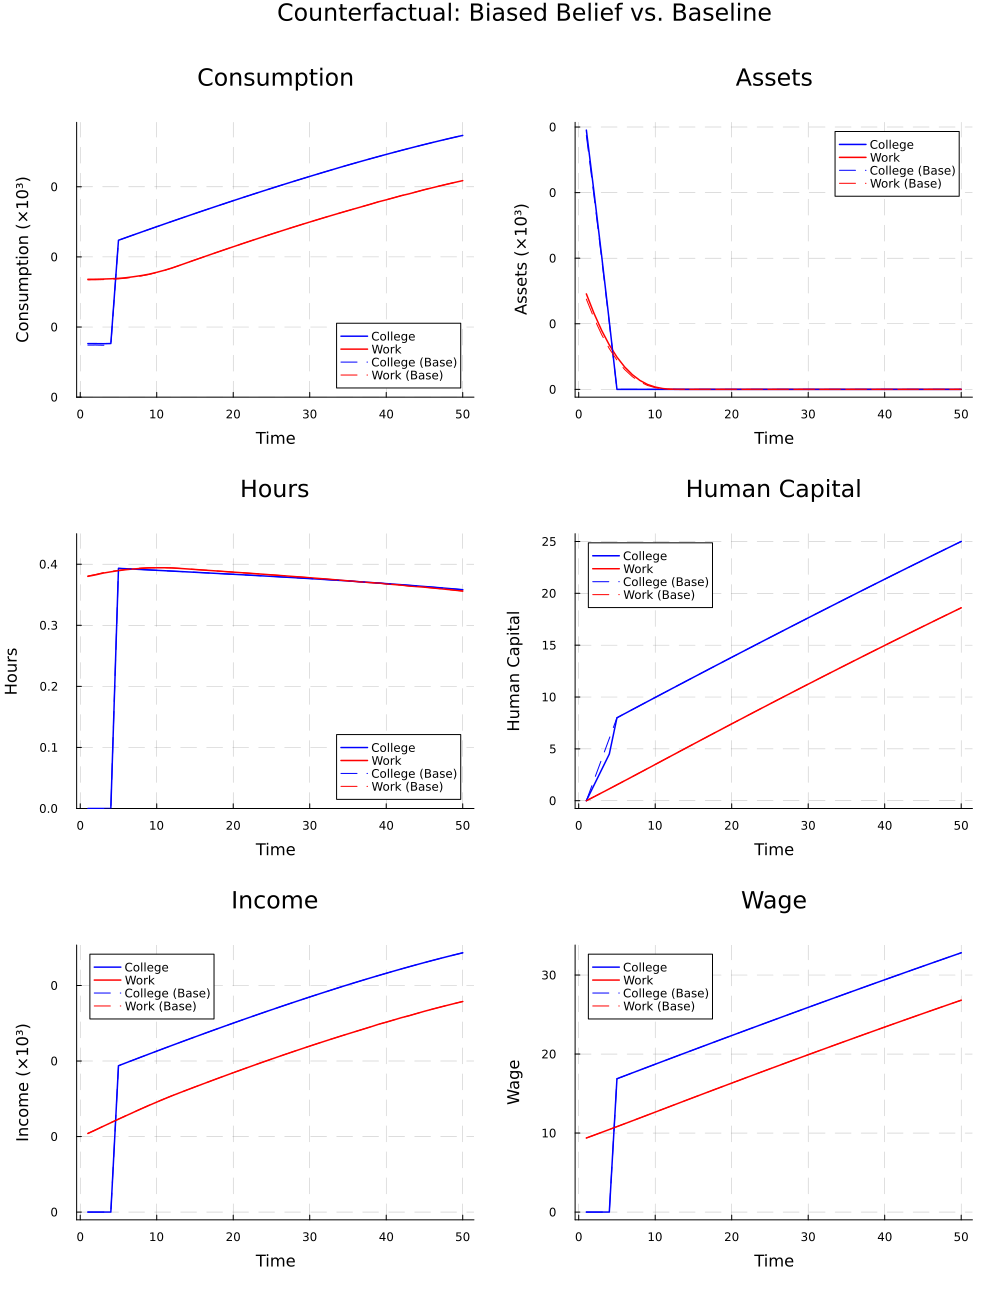

In [51]:
baseline_sim = extract_simulation_by_path(model_baseline, path_choice_baseline)
hetro_sim    = extract_simulation_by_path(model, path_choice);
# Baseline plot (no counterfactual lines)
p_baseline = plot_simulation_results(model_baseline, path_choice_baseline, "Baseline Simulation: College vs. Work Paths")

# Counterfactual plot (with baseline overlay)
p_cf2 = plot_simulation_results(model, path_choice,
                               "Counterfactual: Biased Belief vs. Baseline";
                               baseline_sim = baseline_sim)

# Display the plots (if using Julia REPL or Pluto)
#display(p_baseline)
display(p_cf2)

### Add population beliefs to code based on Bleemer and Zafar 2017

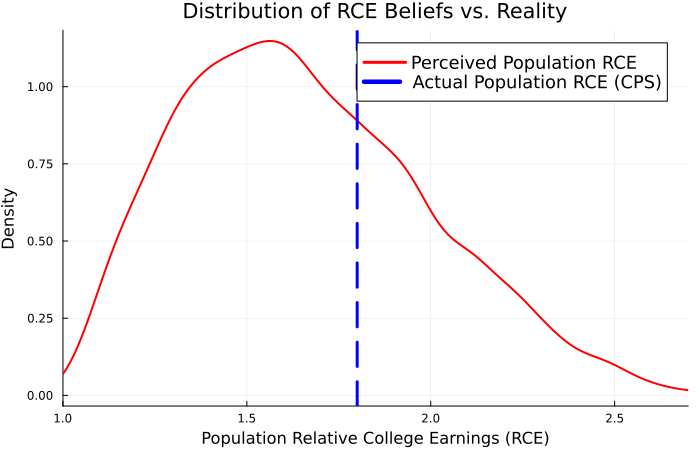

In [52]:
using Distributions, StatsPlots

simN = 5000
α, β = 2.2, 4.5  # Try these, adjust as needed

# Simulate from Beta, then scale to [1, 2.7]
z = rand(Beta(α, β), simN)
college_boost_belief_vec = 1 .+ 2.0 .* z

actual_rce = 1.8

plt = density(college_boost_belief_vec, color=:red, lw=2, label="Perceived Population RCE",
    xlim=(1,2.7), xlabel="Population Relative College Earnings (RCE)", ylabel="Density", legend=:topright, size=(700,450)
)
vline!([actual_rce], color=:blue, lw=3, linestyle=:dash, label="Actual Population RCE (CPS)")
plot!(legendfontsize=12, grid=:on, title="Distribution of RCE Beliefs vs. Reality")

Discritization of belief disturbution

In [53]:
α, β = 2.0, 5.0                  # Parameters for Beta distribution (can be changed)
z = rand(Beta(α, β), simN)
rce_belief_vec = 1 .+ 2.0 .* z   # Belief in [1, 3] (continuous)

# 2. --- Bin Beliefs into Discrete Types ---

bin_edges = 1.0:0.1:3.0
num_bins = length(bin_edges) - 1

# Assign each agent to a bin index (1...num_bins)
belief_type = similar(rce_belief_vec, Int)
for i in 1:simN
    bin_idx = min(searchsortedfirst(bin_edges, rce_belief_vec[i]) - 1, num_bins)
    belief_type[i] = bin_idx < 1 ? 1 : bin_idx
end

# Bin midpoints (for reporting/analysis)
rce_mid = [ (bin_edges[j] + bin_edges[j+1]) / 2 for j in 1:num_bins ]

# If you need to convert to "college_boost" for your model, do it here
college_boost_belief_bin = (rce_mid .- 1) ./ 0.4  # Example conversion
college_boost_belief_bin = round.(college_boost_belief_bin, digits=3);

In [54]:
model_hetro, path_choice_hetro = simulate_model_with_multiple_beliefs(
    model,
    college_boost_belief_bin,         # or college_boost_belief_bin, depending on model expectation
    belief_type,
    sim_a_init,
    sim_k_init
);

Number choosing college: 1234
Number choosing work:    3766


In [55]:
# 5. --- Aggregate Results by Belief Bin ---

n_agents = [count(belief_type .== m) for m in 1:num_bins]
n_college = [count(path_choice_hetro[belief_type .== m] .== :college) for m in 1:num_bins]
n_work = [count(path_choice_hetro[belief_type .== m] .== :work) for m in 1:num_bins]
frac_college = [n_agents[m] == 0 ? NaN : n_college[m] / n_agents[m] for m in 1:num_bins]

belief_df = DataFrame(
    RCE = rce_mid,
    college_boost = college_boost_belief_bin,
    n_agents = n_agents,
    n_college = n_college,
    n_work = n_work,
    frac_college = frac_college
)

# Totals row
total_college = sum(n_college)
total_work    = sum(n_work)
total_agents  = sum(n_agents)


totals_row = DataFrame(
    RCE = [1.80],
    college_boost = [-],
    n_agents = [total_agents],
    n_college = [total_college],
    n_work = [total_work],
    frac_college = [total_college / total_agents],
)

# Concatenate (row bind) the summary and the totals
belief_df = vcat(belief_df, totals_row)


Row,RCE,college_boost,n_agents,n_college,n_work,frac_college
,Float64,Any,Int64,Int64,Int64,Float64
1,1.05,0.125,156,0,156,0.0
2,1.15,0.375,415,0,415,0.0
3,1.25,0.625,538,0,538,0.0
4,1.35,0.875,621,0,621,0.0
5,1.45,1.125,626,98,528,0.15655
6,1.55,1.375,548,192,356,0.350365
7,1.65,1.625,478,206,272,0.430962
8,1.75,1.875,460,223,237,0.484783
9,1.85,2.125,384,154,230,0.401042


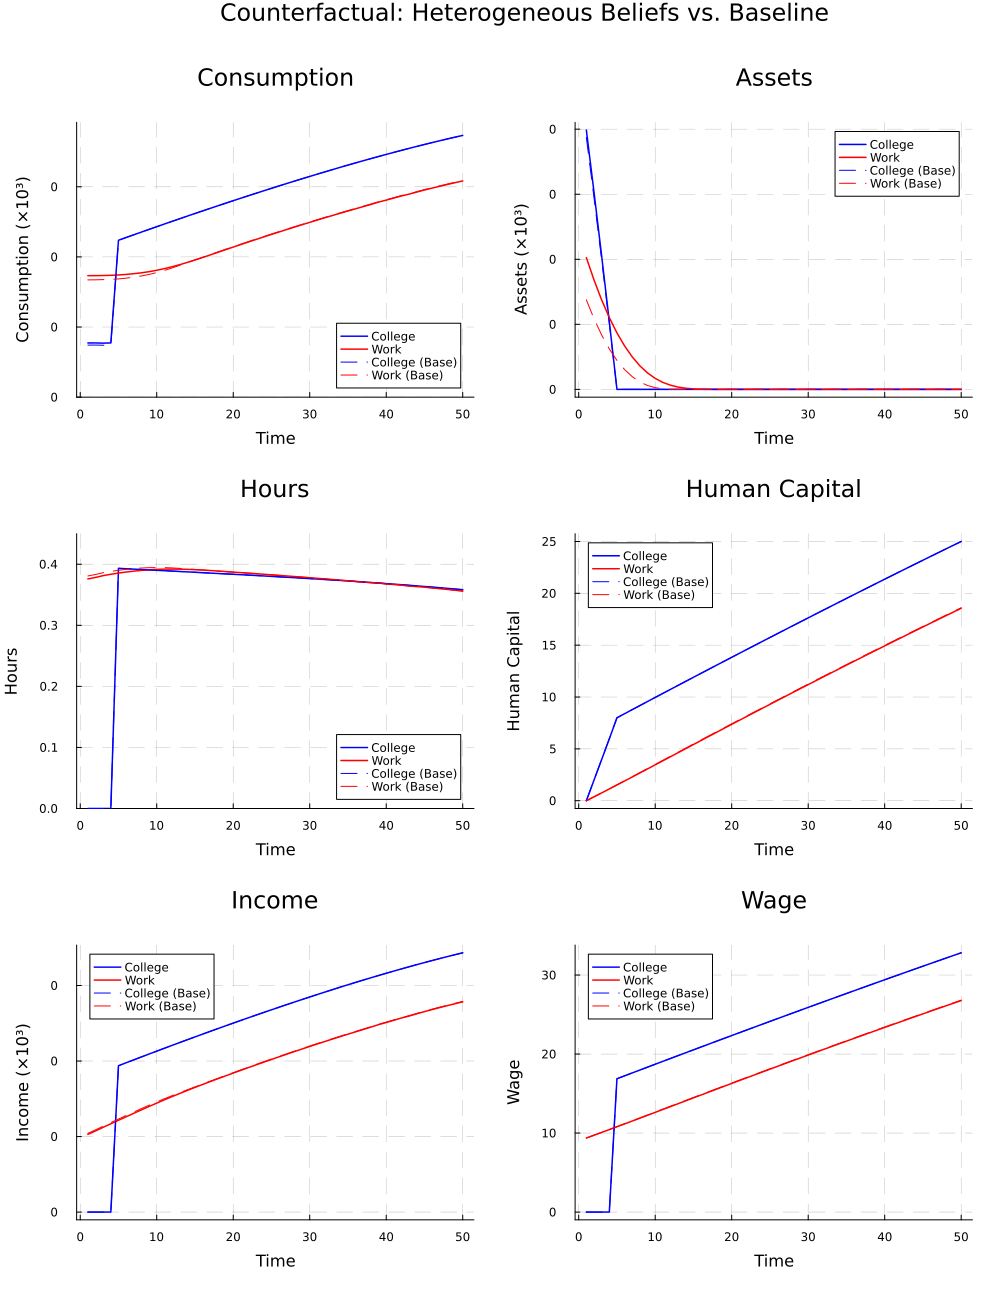

In [56]:
baseline_sim = extract_simulation_by_path(model_baseline, path_choice_baseline)
hetro_sim    = extract_simulation_by_path(model_hetro, path_choice_hetro);
# Baseline plot (no counterfactual lines)
p_baseline = plot_simulation_results(model_baseline, path_choice_baseline, "Baseline Simulation: College vs. Work Paths")

# Counterfactual plot (with baseline overlay)
p_cf1 = plot_simulation_results(model_hetro, path_choice_hetro,
                               "Counterfactual: Heterogeneous Beliefs vs. Baseline";
                               baseline_sim = baseline_sim)

# Display the plots (if using Julia REPL or Pluto)
#display(p_baseline)
display(p_cf1)